<a href="https://colab.research.google.com/github/nandan7013/nandan7013/blob/main/demo/bank_turnover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BANK TURNOVER PREDICTION**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/bank_turnover_dataset.csv")

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6214,458,Germany,Male,35,9,146780.52,2,1,1,3476.38,0
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0
7543,777,France,Male,43,1,0.00,2,1,0,21785.91,0
7198,670,France,Male,33,6,88294.60,1,1,0,66979.06,0


In [ ]:
!pip install scikit-learn
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary','Tenure']
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
df[cols_to_scale]=scalar.fit_transform(df[cols_to_scale])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [ ]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)     #it is showing error because we already executed

In [ ]:
df.Gender

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df2=pd.get_dummies(data=df,columns=['Geography'])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1


In [ ]:
df2.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

**TRAIN TEST SPLIT**

In [ ]:
x=df2.drop('Exited',axis='columns')
y=df2['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
len(x_train)

8000

In [ ]:
len(x_test)

2000

In [ ]:
x_train[:5]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,1,0.229730,0.7,0.517012,2,0,0,0.434670,1,0,0


In [ ]:
x_train.shape

(8000, 12)

***build a model(ANN) using tensorflow/keras***

In [ ]:
!pip install TensorFlow 

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.7009 - accuracy: 0.6154
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5881 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4794 - accuracy: 0.7965
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4527 - accuracy: 0.8016
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4291 - accuracy: 0.8120
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8240
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3926 - accuracy: 0.8354
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3816 - accuracy: 0.8384
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8450
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3703 - accura

In [ ]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8465


[0.3539646565914154, 0.8464999794960022]

***visualizise the data***

In [ ]:
yp=model.predict(x_test)
yp[:5]

array([[0.04893646],
       [0.07385749],
       [0.10346848],
       [0.06876966],
       [0.10511854]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [ ]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.94      0.91      1595\n           1       0.67      0.48      0.56       405\n\n    accuracy                           0.85      2000\n   macro avg       0.77      0.71      0.73      2000\nweighted avg       0.83      0.85      0.84      2000\n'

***VISUALIZATION ***

Text(69.0, 0.5, 'truth')

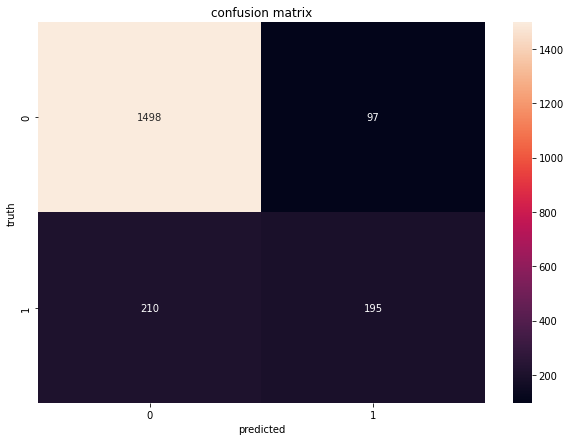

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('truth')

**Accuracy**

In [ ]:
round((1498+195)/(1498+210+97+195),2)

0.85

**Precision for 0 class. i.e. Precision for customers who did not exited**

In [ ]:
round(1498/(1498+210),2)

0.88

**Precision for 1 class. i.e. Precision for customers who were exited**

In [ ]:
round(195/(195+97),2)

0.67

**recall for class 0**

In [ ]:
round(1498/(1498+97),2)

0.94

**recall for class 1**

In [ ]:
round(210/(210+195),2)

0.52

**F1 score for class 0**

In [ ]:
2*((0.88*0.94)/(0.88+0.94))

0.909010989010989

**F1 score for class 1**

In [ ]:
2*((0.67*0.52)/(0.67+0.52))

0.5855462184873951